In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# --------------------------------------------------------------------SOBRE O DATASET -------------------------------------------------------------------------------------------------------------
# The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

"""
Link: https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification
"""

'\nLink: https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification\n'

In [7]:
test = pd.read_csv(r"Test.csv")
train = pd.read_csv(r"Train.csv")

In [8]:
df = pd.concat([train, test])

In [9]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [10]:
df.shape

(49732, 17)

In [11]:
df.y = df.y.replace('no', '0').replace('yes', '1').astype(int)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0


## Analise Estatística

In [12]:
# Conjunto de dados desbalanceado, target inicialmente nao tem nem 12% do total.
df.y.value_counts()

y
0    43922
1     5810
Name: count, dtype: int64

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892,0.116826
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838,0.321216
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [14]:
def plot_distribuicao(df):
    null_counts = df.isnull().sum()  # Obtem a contagem de valores nulos
    plt.figure(figsize=(5, 5))
    sns.barplot(x=null_counts.index, y=null_counts.values)
    sns.barplot(x=null_counts.index, y=null_counts.values)
    plt.xticks(rotation=90)
    plt.title('Quantidade de Valores Nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Quantidade de Valores Nulos')
    plt.show()


def plot_outliers(df):
    fig, axes = plt.subplots(4,8,figsize = (20,15))
    axes = axes.flatten()
    for i, column in enumerate(df.columns):
        sns.boxplot(df[column], ax= axes[i])
        axes[i].set_title(f'Outliers: {column}')

    plt.tight_layout()
    plt.show()

def plot_correlation(df):
    # Correlation study
    correlation_matrix = df.corr()
    correlation_matrix

    plt.figure(figsize= (30,20))
    sns.heatmap(correlation_matrix, annot= True, cmap= 'magma')

def plot_feature_counts(df):
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Get the count of unique values for the column
        counts = df[column].value_counts()
        
        # Create a bar plot for the column
        plt.figure(figsize=(6, 6))
        counts.plot(kind='bar')
        plt.title(f'Contagem de Valores: {column}')
        plt.xlabel(column)
        plt.ylabel('Quantidade')
        plt.show()


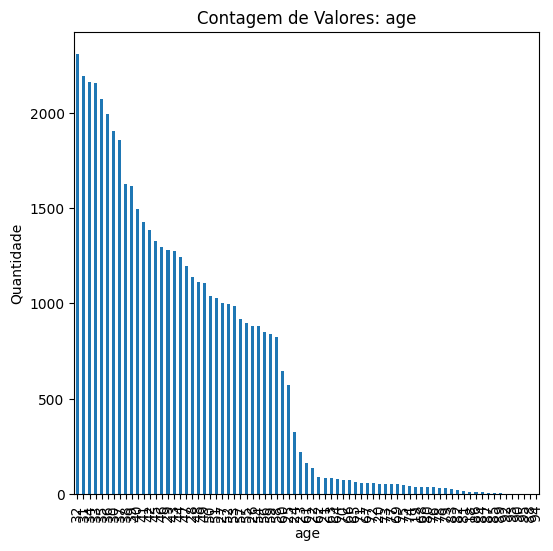

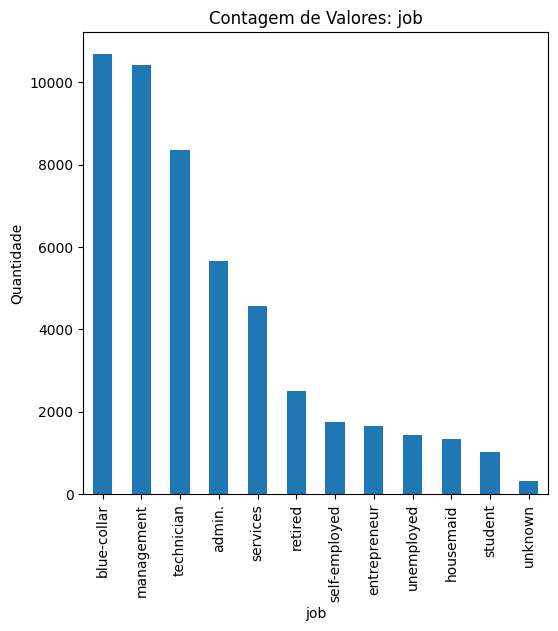

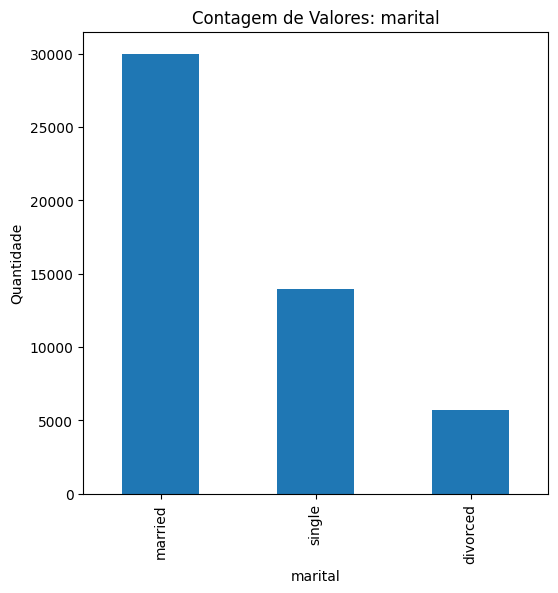

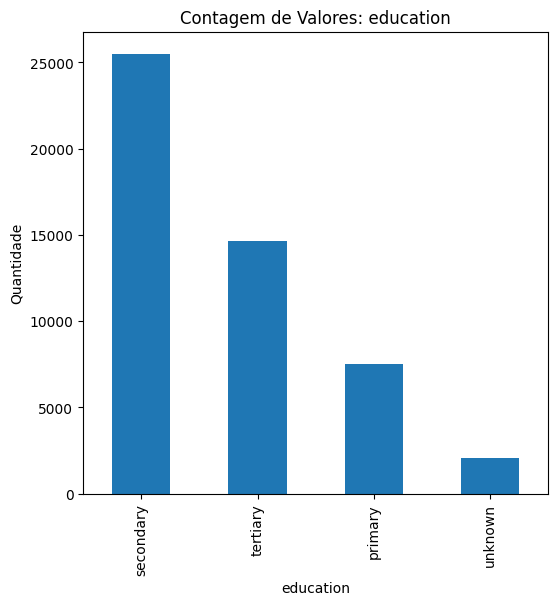

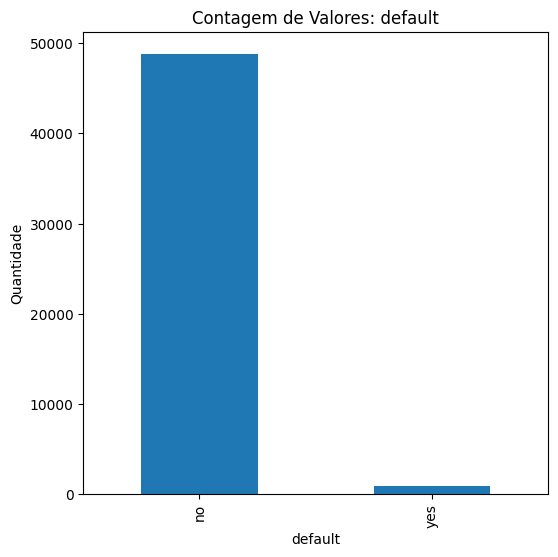

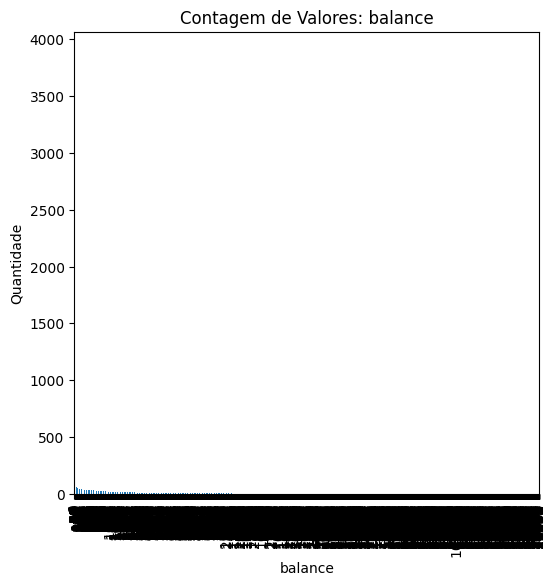

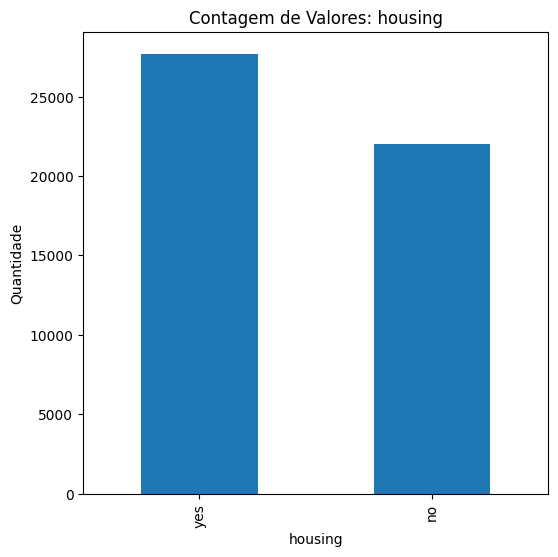

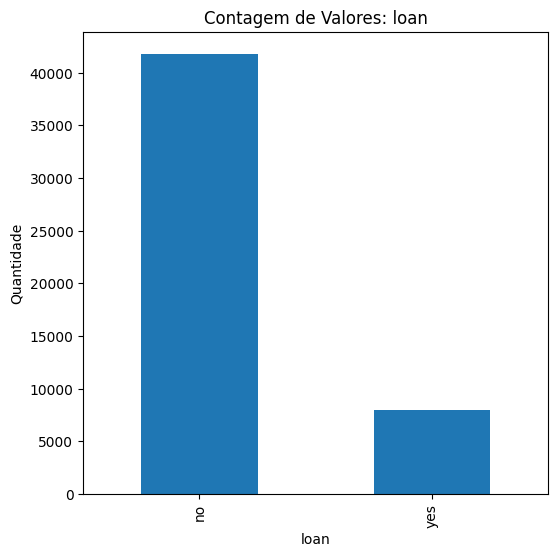

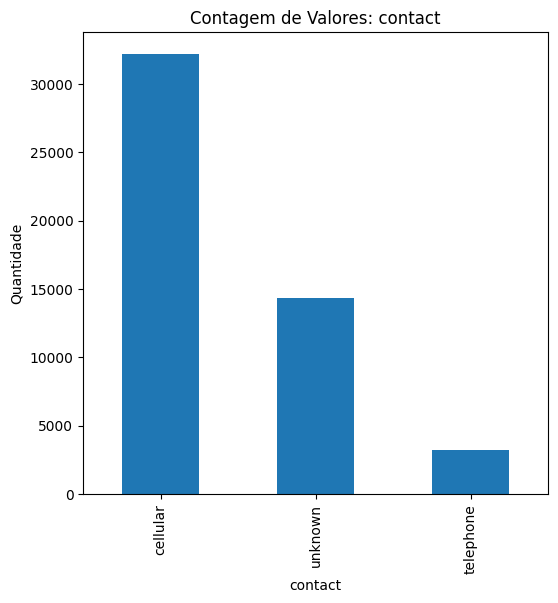

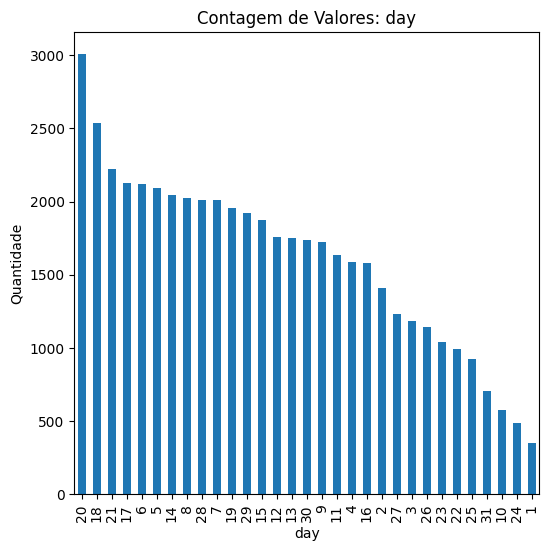

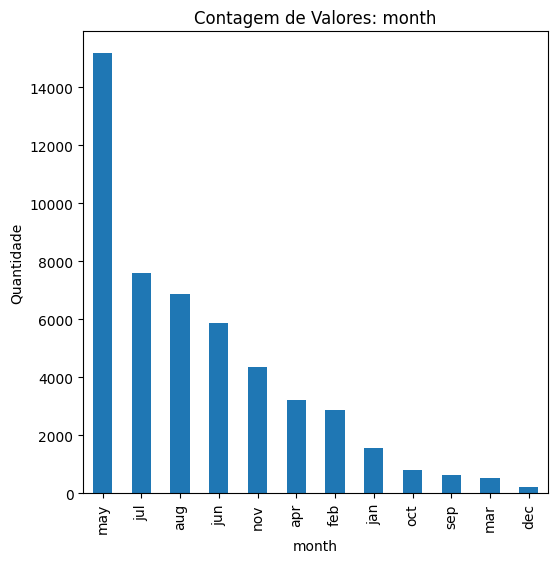

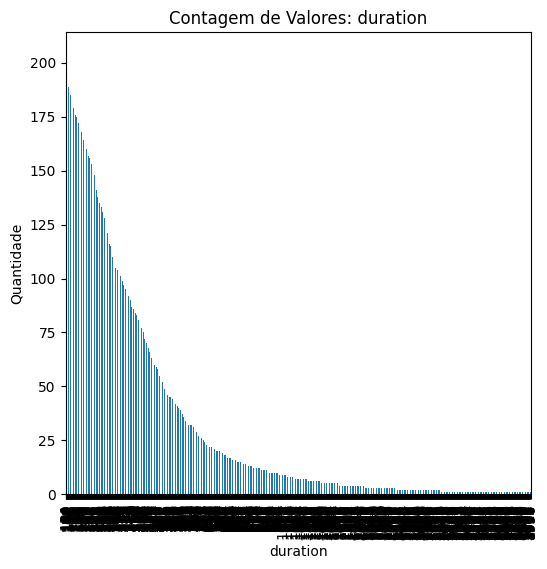

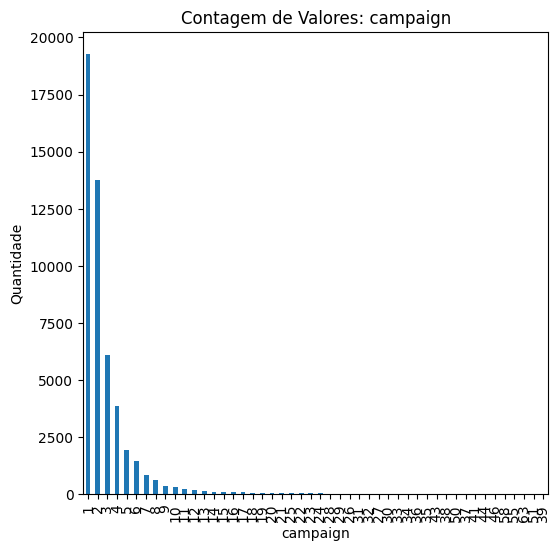

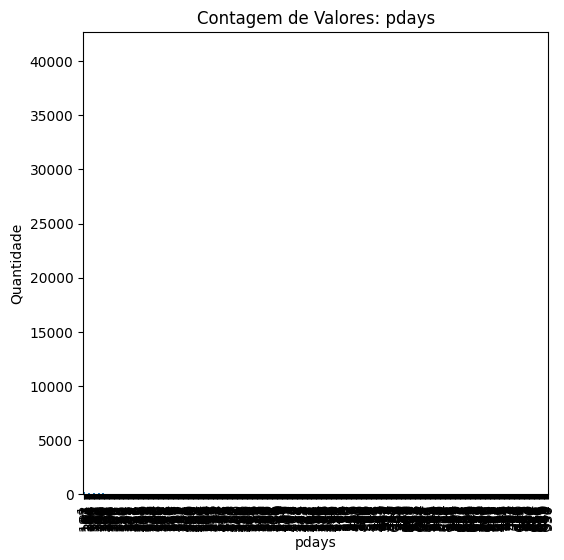

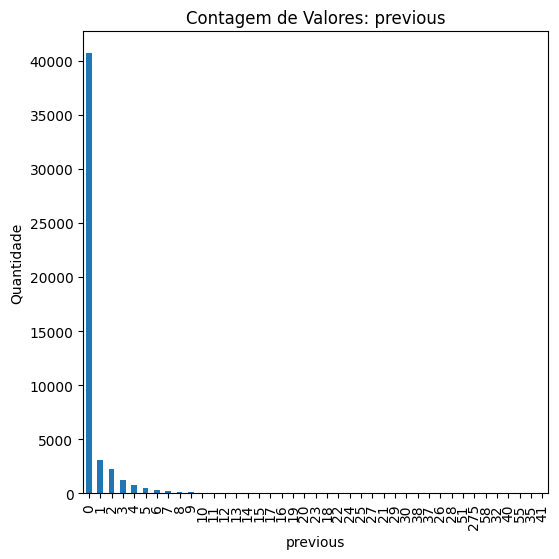

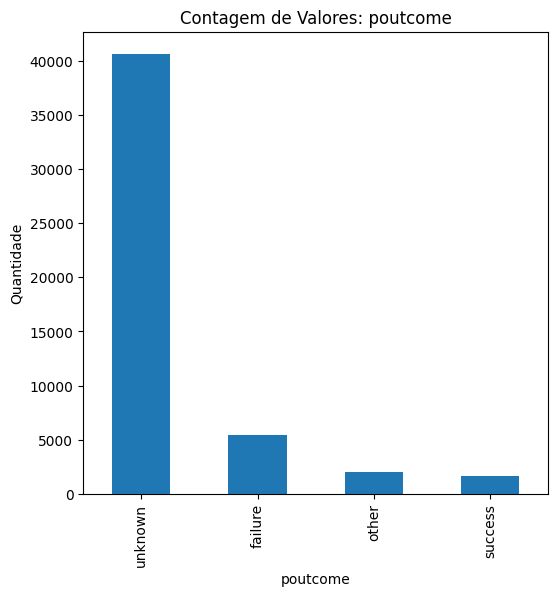

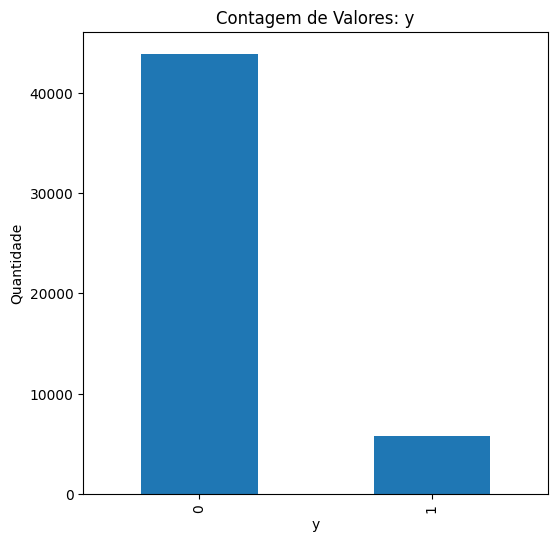

In [15]:
plot_feature_counts(df)

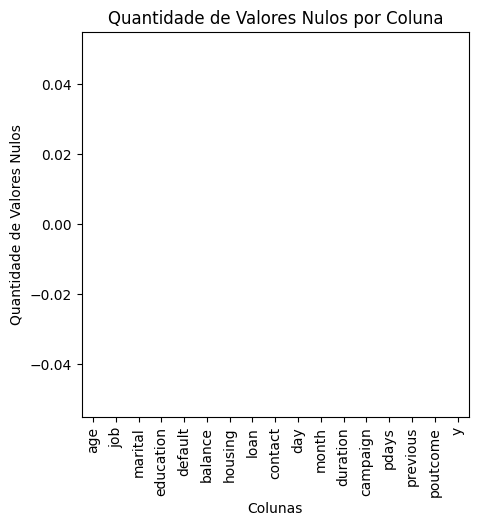

In [16]:
plot_distribuicao(df)

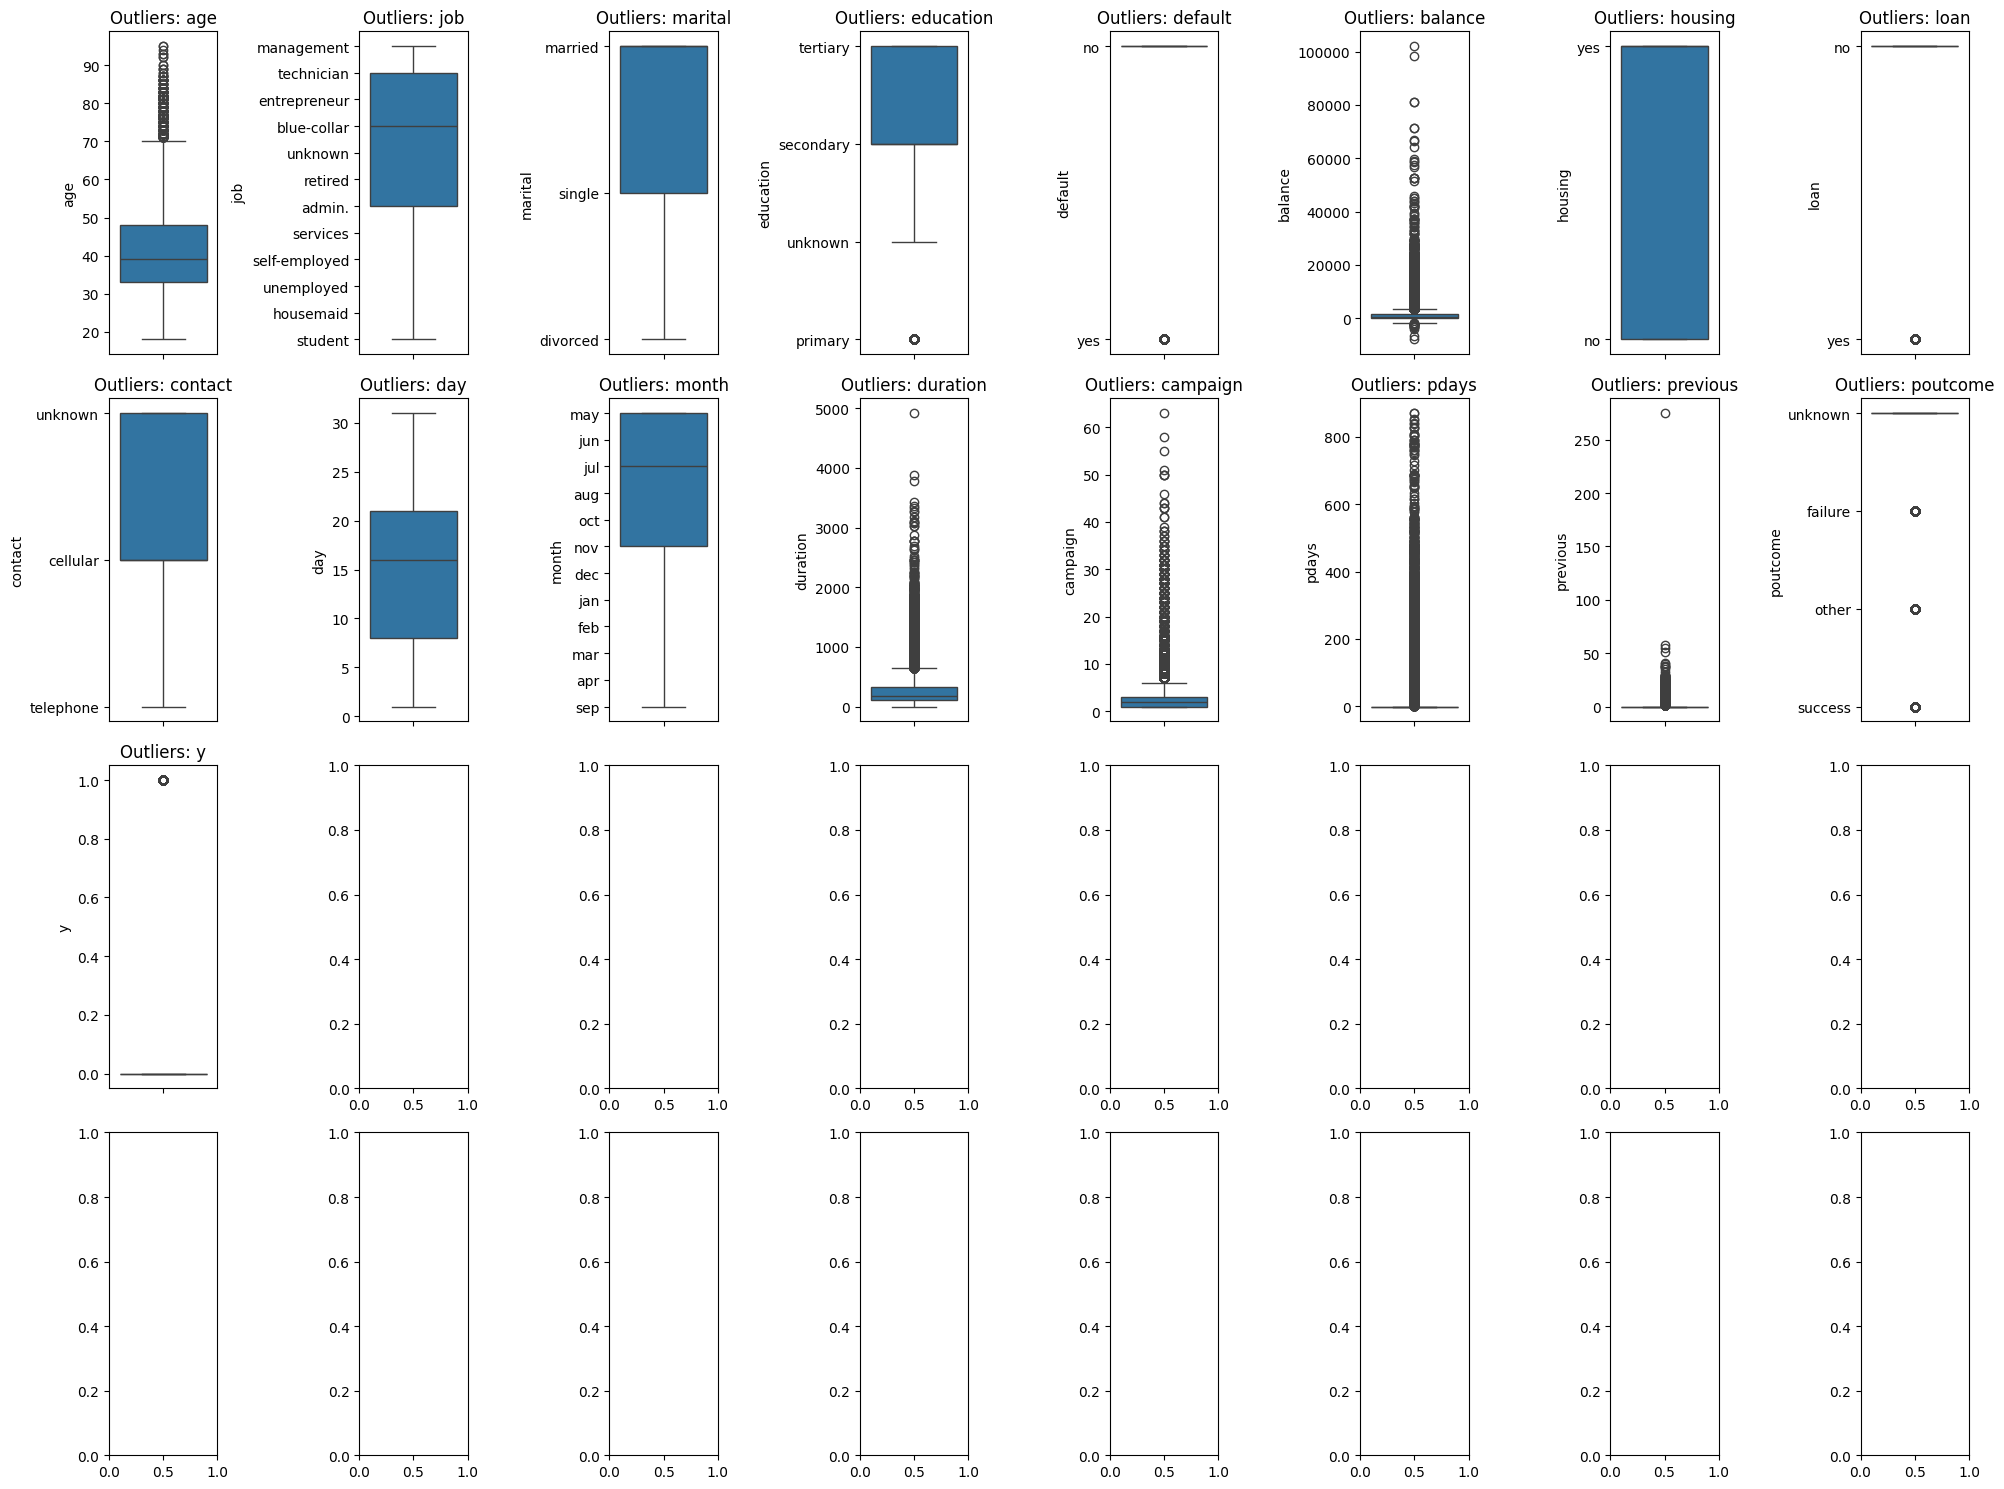

In [17]:
plot_outliers(df)

## Pipeline de Pré Processamento

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve,classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE

In [19]:
# Separar features e target
X = df.drop('y', axis=1)
y = df['y']

# Identificar colunas categóricas e numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

In [20]:
# Criar os transformadores para as colunas categóricas e numéricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combinar transformadores em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#--------------------------------------------------------------------------------Pipelines ------------------------------------------------------------------------------------
pipeline_no_reducion = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_Svd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2)), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_NMF= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ipca', IncrementalPCA(n_components=2)),  # Usar IncrementalPCA no lugar de NMF
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_Kernel_PCA= Pipeline(steps=[
    ('preprocessor', preprocessor),
    (KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

#--------------------------------------------------------------------------------Random Florest --------------------------------------------------------------------------------

pipeline_svd_random = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=2)), 
    ('knn',RandomForestClassifier())
])
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
def treina_modelo(modelo):
    # Treinar o modelo
    modelo.fit(X_train, y_train)

    # Fazer previsões
    y_pred = modelo.predict(X_test)

    # Avaliar o modelo
    print("Acuracia do Modelo eh:",accuracy_score(y_test, y_pred))
    print("\n")
    print(classification_report(y_test, y_pred))
    print("\n")

    no_reducion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(no_reducion, annot=True, fmt='d', cmap='magma', cbar=False)
    plt.title('Matriz de Confusão - KNN')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

Acuracia do Modelo eh: 0.8623994638069705


              precision    recall  f1-score   support

           0       0.90      0.95      0.92     13209
           1       0.33      0.20      0.25      1711

    accuracy                           0.86     14920
   macro avg       0.62      0.57      0.59     14920
weighted avg       0.84      0.86      0.85     14920





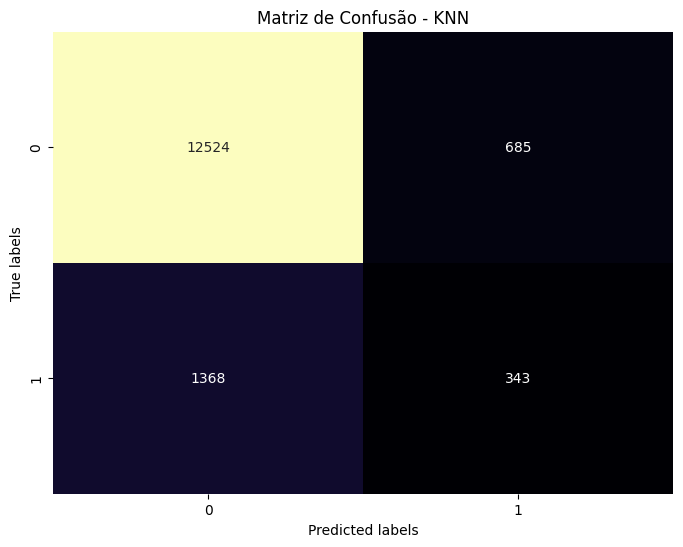

In [23]:
treina_modelo(pipeline_NMF)

Acuracia do Modelo eh: 0.8947721179624665


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13209
           1       0.56      0.40      0.46      1711

    accuracy                           0.89     14920
   macro avg       0.74      0.68      0.70     14920
weighted avg       0.88      0.89      0.89     14920





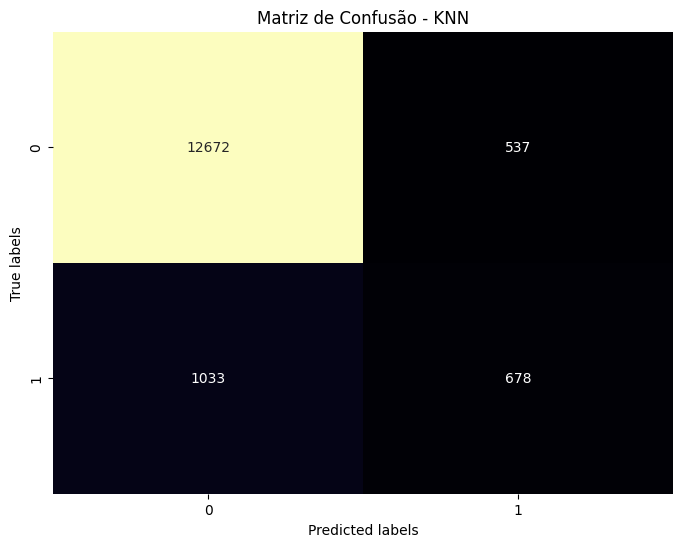

In [24]:
treina_modelo(pipeline_no_reducion)

Acuracia do Modelo eh: 0.856367292225201


              precision    recall  f1-score   support

           0       0.90      0.95      0.92     13209
           1       0.28      0.16      0.21      1711

    accuracy                           0.86     14920
   macro avg       0.59      0.55      0.56     14920
weighted avg       0.83      0.86      0.84     14920





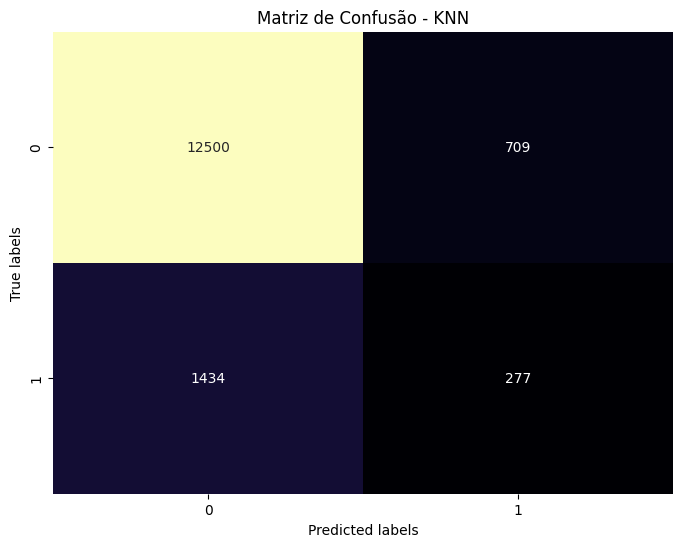

In [25]:
treina_modelo(pipeline_Svd)

Acuracia do Modelo eh: 0.8868632707774798


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     13209
           1       0.52      0.22      0.31      1711

    accuracy                           0.89     14920
   macro avg       0.71      0.60      0.63     14920
weighted avg       0.86      0.89      0.87     14920





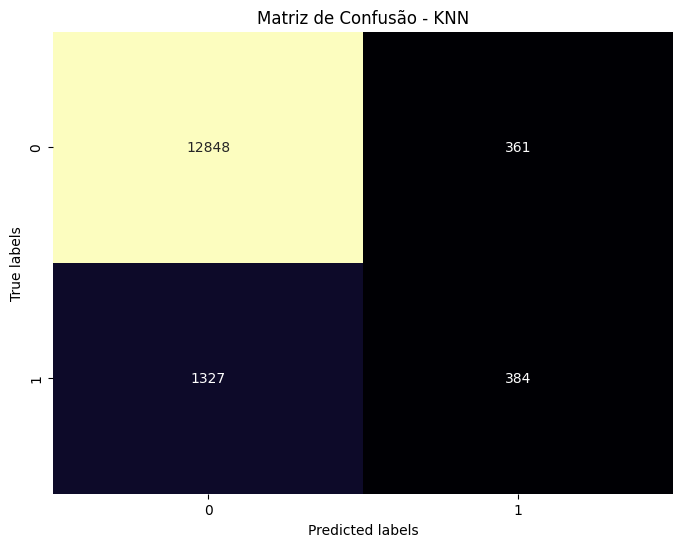

In [26]:
treina_modelo(pipeline_svd_random)

## Agora com Balanceamento des dados, usando SMOTE

In [27]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline_no_reducion_Smote = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(sampling_strategy=0.5)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_Svd_Smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('svd', TruncatedSVD(n_components=2)), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_NMF_Smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5)),
    ('ipca', IncrementalPCA(n_components=2)), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_svd_random_Smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5)),
    ('svd', TruncatedSVD(n_components=2)), 
    ('rf', RandomForestClassifier())
])



Acuracia do Modelo eh: 0.8756032171581769


              precision    recall  f1-score   support

           0       0.95      0.90      0.93     13209
           1       0.47      0.67      0.55      1711

    accuracy                           0.88     14920
   macro avg       0.71      0.79      0.74     14920
weighted avg       0.90      0.88      0.88     14920





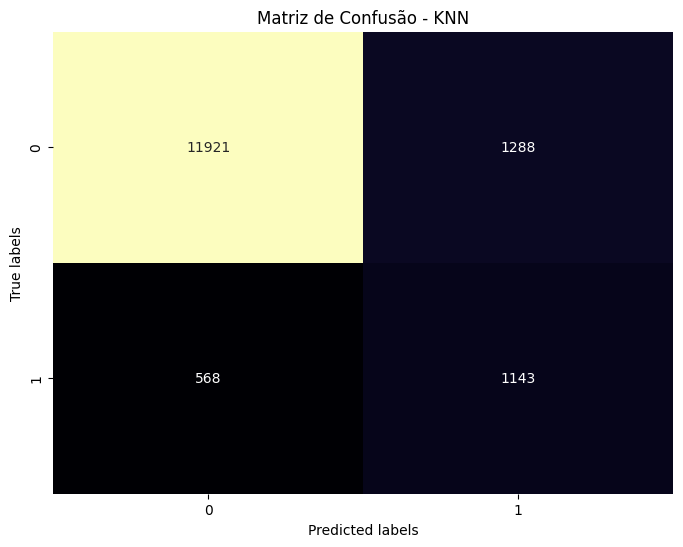

In [28]:
treina_modelo(pipeline_no_reducion_Smote)

Acuracia do Modelo eh: 0.7927613941018766


              precision    recall  f1-score   support

           0       0.93      0.83      0.88     13209
           1       0.28      0.53      0.37      1711

    accuracy                           0.79     14920
   macro avg       0.61      0.68      0.62     14920
weighted avg       0.86      0.79      0.82     14920





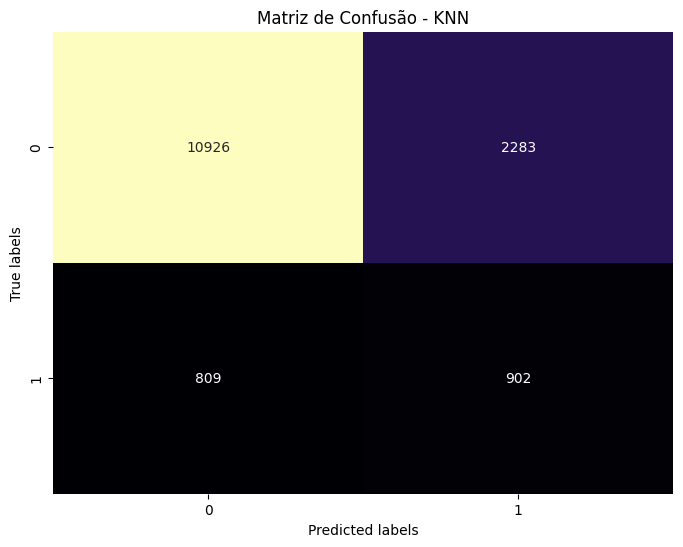

In [29]:
treina_modelo(pipeline_NMF_Smote)

Acuracia do Modelo eh: 0.856367292225201


              precision    recall  f1-score   support

           0       0.90      0.95      0.92     13209
           1       0.28      0.16      0.21      1711

    accuracy                           0.86     14920
   macro avg       0.59      0.55      0.56     14920
weighted avg       0.83      0.86      0.84     14920





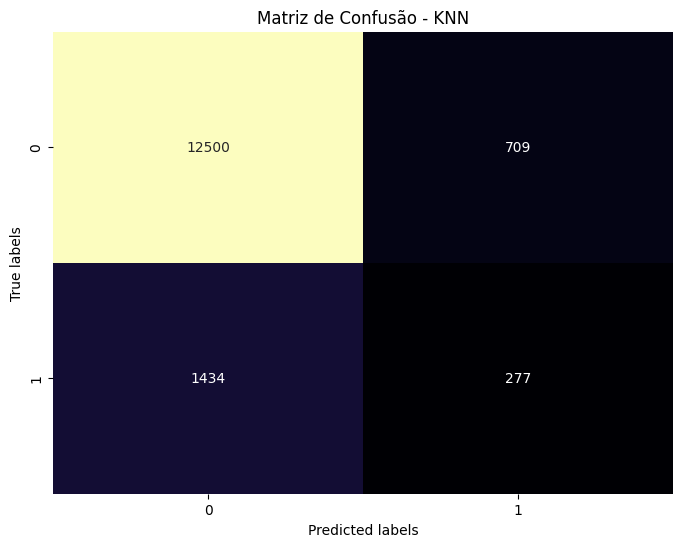

In [30]:
treina_modelo(pipeline_Svd)

Acuracia do Modelo eh: 0.8158847184986595


              precision    recall  f1-score   support

           0       0.94      0.85      0.89     13209
           1       0.32      0.55      0.41      1711

    accuracy                           0.82     14920
   macro avg       0.63      0.70      0.65     14920
weighted avg       0.87      0.82      0.84     14920





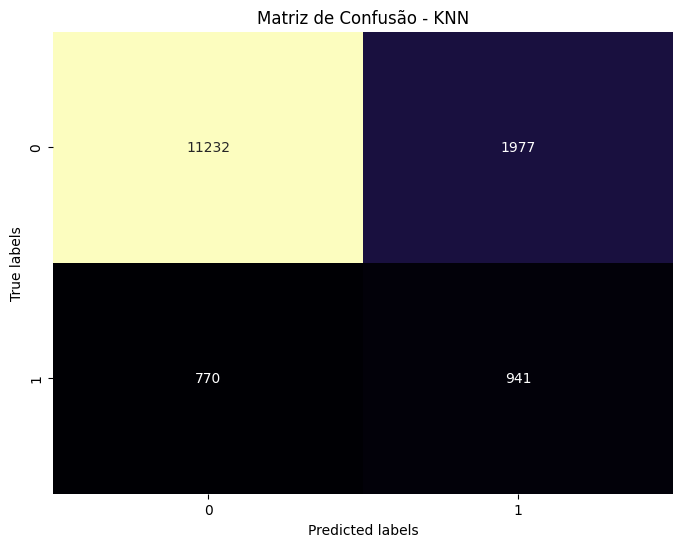

In [31]:
treina_modelo(pipeline_svd_random_Smote)

## Analise dos Modelos:

In [32]:
def treina_modelo_e_retorna_probabilidades(modelo, X_test, y_test):
    # Treinar o modelo
    modelo.fit(X_train, y_train)

    # Fazer previsões de probabilidade
    y_prob = modelo.predict_proba(X_test)[:, 1]

    return y_prob

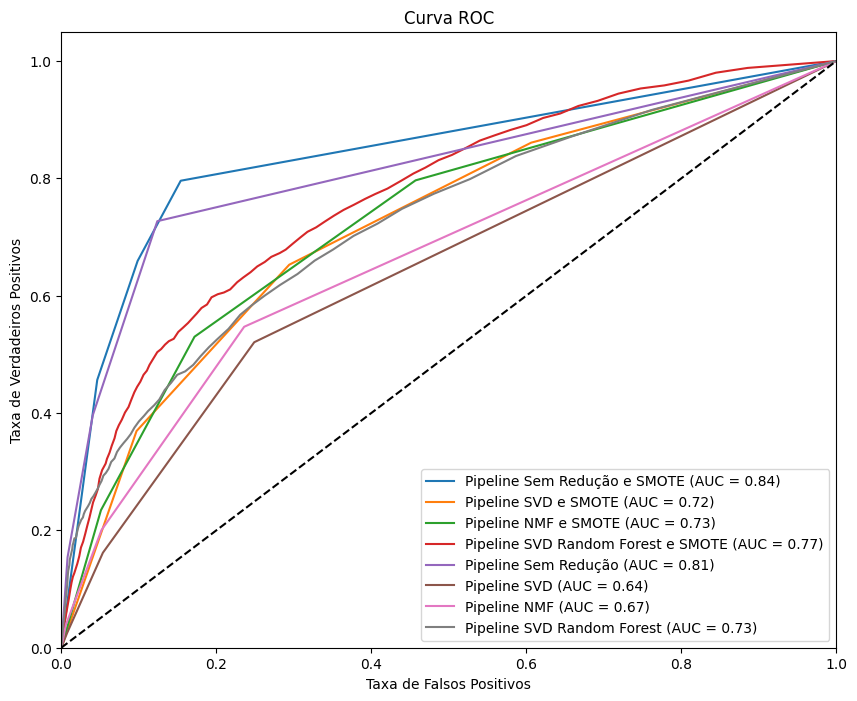

In [33]:
pipelines = {
    'Pipeline KNN Sem Redução e SMOTE': pipeline_no_reducion_Smote,
    'Pipeline KNN SVD e SMOTE': pipeline_Svd_Smote,
    'Pipeline KNN NMF e SMOTE': pipeline_NMF_Smote,
    'Pipeline Random Forest SVD  e SMOTE': pipeline_svd_random_Smote,
    'Pipeline KNN Sem Redução': pipeline_no_reducion,
    'Pipeline KNN SVD': pipeline_Svd,
    'Pipeline KNN NMF': pipeline_NMF,
    'Pipeline Random Forest SVD': pipeline_svd_random
}

# Plotar a curva ROC
plt.figure(figsize=(10, 8))

for nome_pipeline, pipeline in pipelines.items():
    # Obter as probabilidades para a classe positiva
    y_prob = treina_modelo_e_retorna_probabilidades(pipeline, X_test, y_test)
    
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotar a curva ROC
    plt.plot(fpr, tpr, label=f'{nome_pipeline} (AUC = {roc_auc:.2f})')

# Configurar o gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()